In [1]:
from mpl_toolkits.mplot3d import Axes3D #For Basic ploting
from sklearn.preprocessing import StandardScaler #Preprocessing
from sklearn import preprocessing    # Preprocessing
from sklearn.naive_bayes import GaussianNB #import gaussian naive bayes model
from sklearn.tree import DecisionTreeClassifier #import Decision tree classifier
from sklearn import metrics  #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
for dirname, _, filenames in os.walk(r'C:\Users\USER\alif\fix\fix_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:\Users\USER\alif\fix\fix_data\test_mosaic.csv
C:\Users\USER\alif\fix\fix_data\train_mosaic.csv


In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [4]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [5]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

# Check Data Test

In [7]:
nRowsRead = 1000 # specify No. of row. 'None' for whole data
# test_mosaic.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv(r'C:\Users\USER\alif\fix\fix_data\test_mosaic.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'test_mosaic.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 78 columns


# Isi data test_mosaic.csv

In [8]:
df1.head(5)

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,53,87750,2,2,72,264,36,36,36.000000,0.000000,...,32.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,BENIGN
1,53,31073,4,4,120,232,30,30,30.000000,0.000000,...,32.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,BENIGN
2,80,41125329,8,1,387,0,188,0,48.375000,80.505435,...,0.0,1218262.0,0.0,1218262.0,1218262.0,37178044.0,0.00,37178044.0,37178044.0,DoS slowloris
3,53,40633,4,4,140,508,35,35,35.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,BENIGN
4,80,41920705,7,1,211,0,168,0,30.142857,61.300975,...,0.0,2611.0,0.0,2611.0,2611.0,19711185.0,2319322.97,21351194.0,18071176.0,DoS slowloris


### Distribution graphs (histogram/bar graph) of sampled columns:

<ipython-input-3-0121bf3d9d74>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


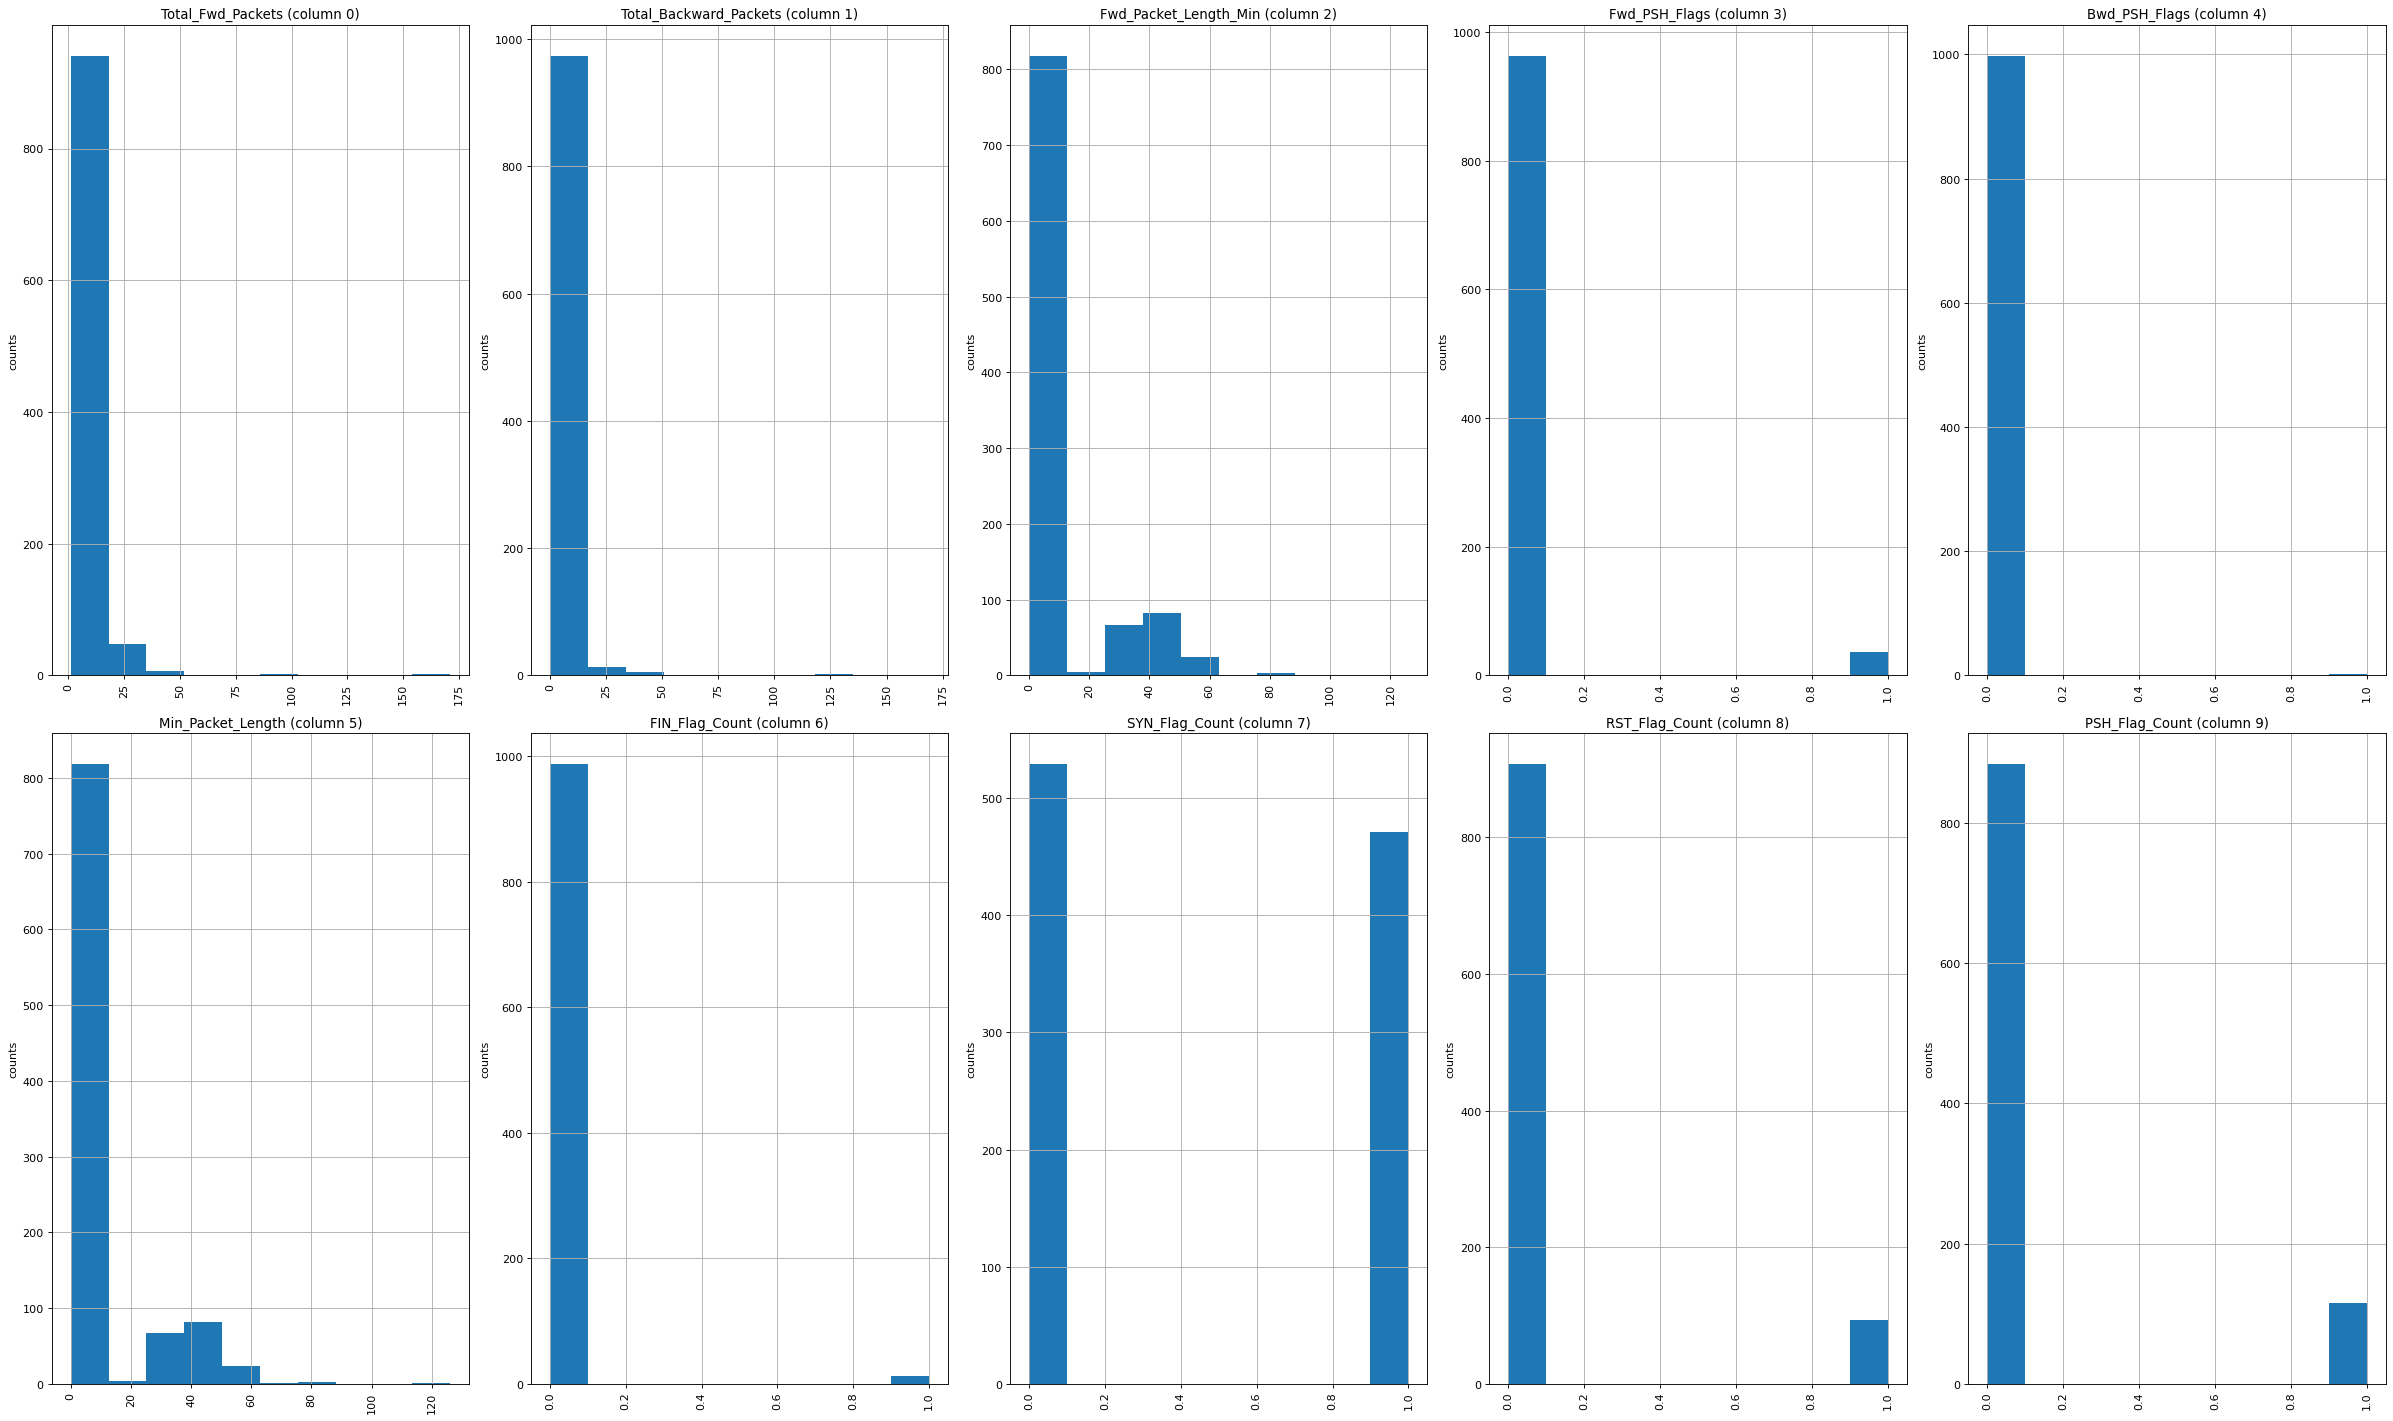

In [9]:
plotPerColumnDistribution(df1, 10, 5)

### Correlation matrix:

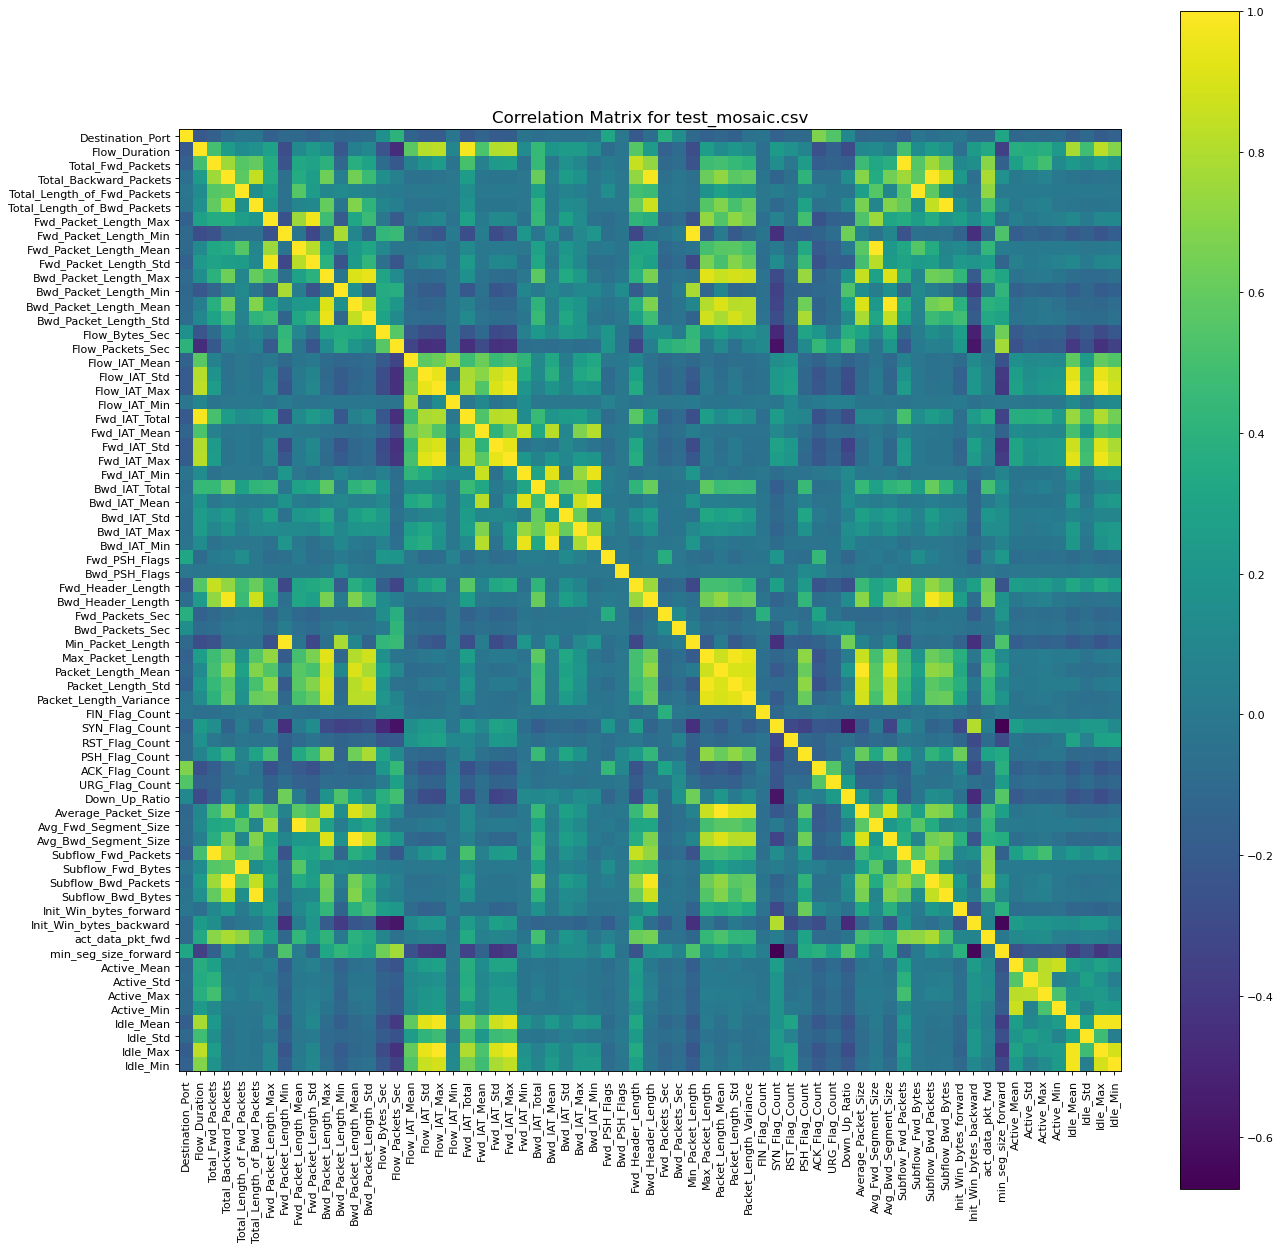

In [10]:
plotCorrelationMatrix(df1, 19)

### Scatter and density plots:

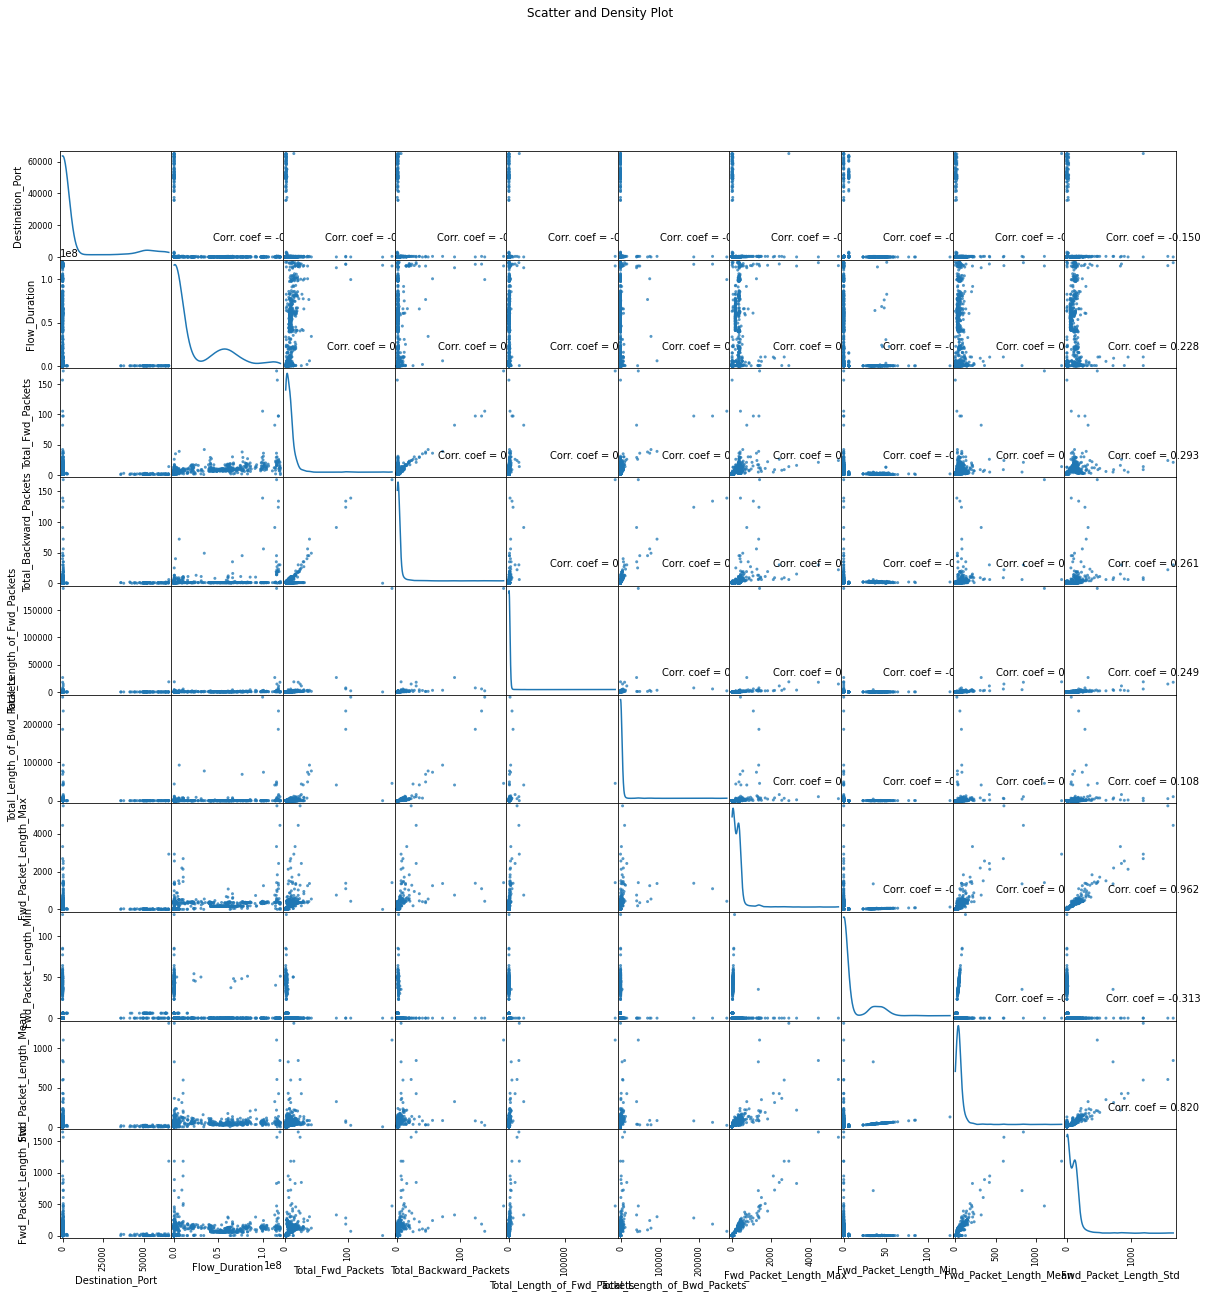

In [12]:
plotScatterMatrix(df1, 20, 10)

# Cek Data Train

In [13]:
nRowsRead = 1000 # specify No. of rows. 'None' for whole file
# train_mosaic.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv(r'C:\Users\USER\alif\fix\fix_data\train_mosaic.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'train_mosaic.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 78 columns


## Isi data train

In [14]:
df2.head(5)

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,80,101168794,20,1,969,0,353,0,48.450000,119.083551,...,0.0,739228.5,743103.4661,1264682.0,213775.0,49700000.0,41400000.0,79000000.0,20500000.0,DoS Hulk
1,60711,58,1,1,0,0,0,0,0.000000,0.000000,...,32.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,53,31146,4,2,148,244,37,37,37.000000,0.000000,...,20.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,80,254704,3,4,429,389,423,0,143.000000,242.505670,...,20.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,443,11932077,12,16,5030,15703,1525,0,419.166667,644.896586,...,20.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


### Distribution graphs (histogram/bar graph) of sampled columns:

<ipython-input-3-0121bf3d9d74>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


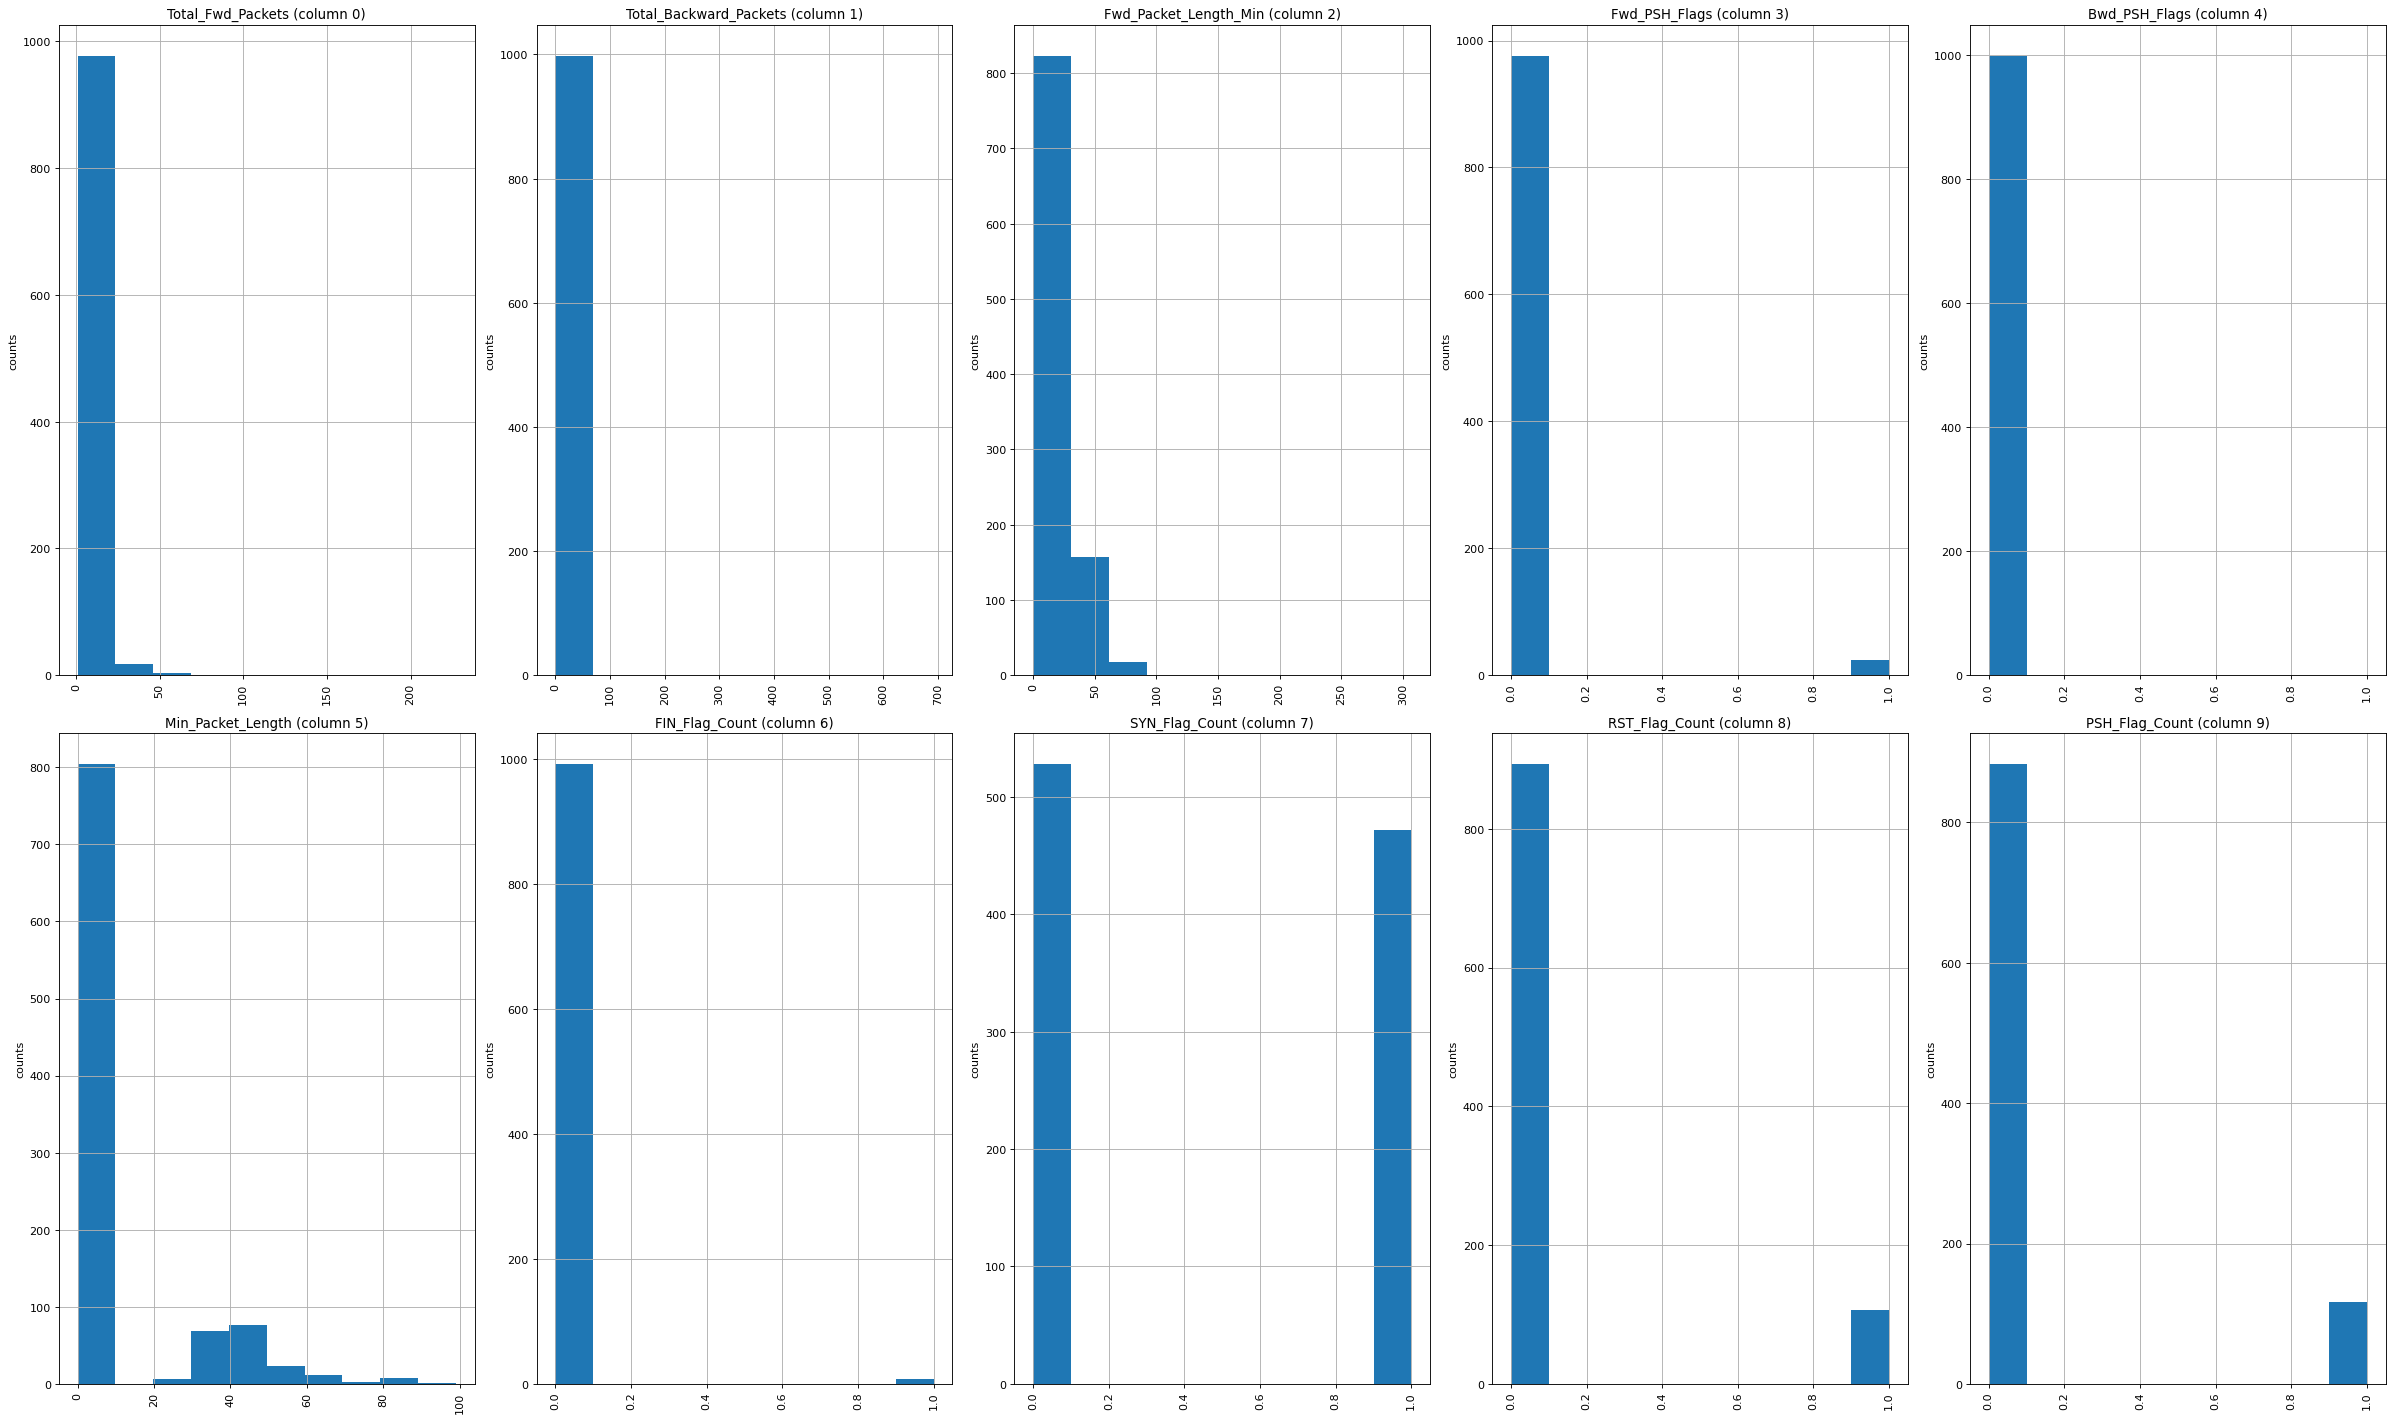

In [15]:
plotPerColumnDistribution(df2, 10, 5)

### Correlation matrix:

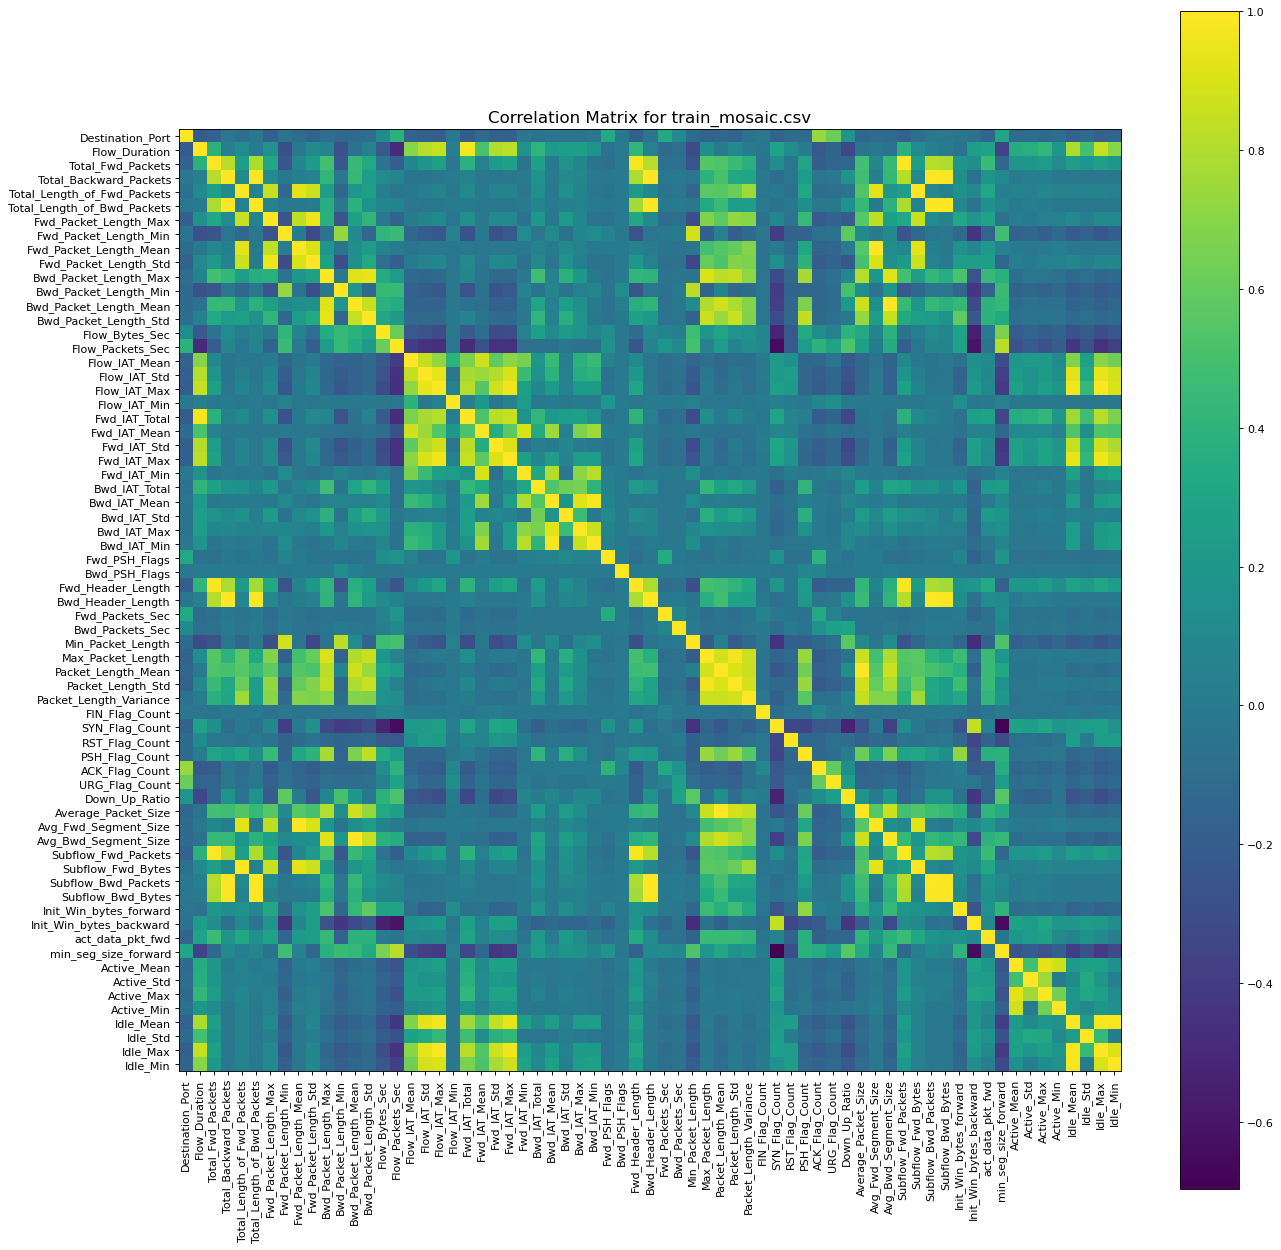

In [16]:
plotCorrelationMatrix(df2, 19)

### Scatter and density plots:

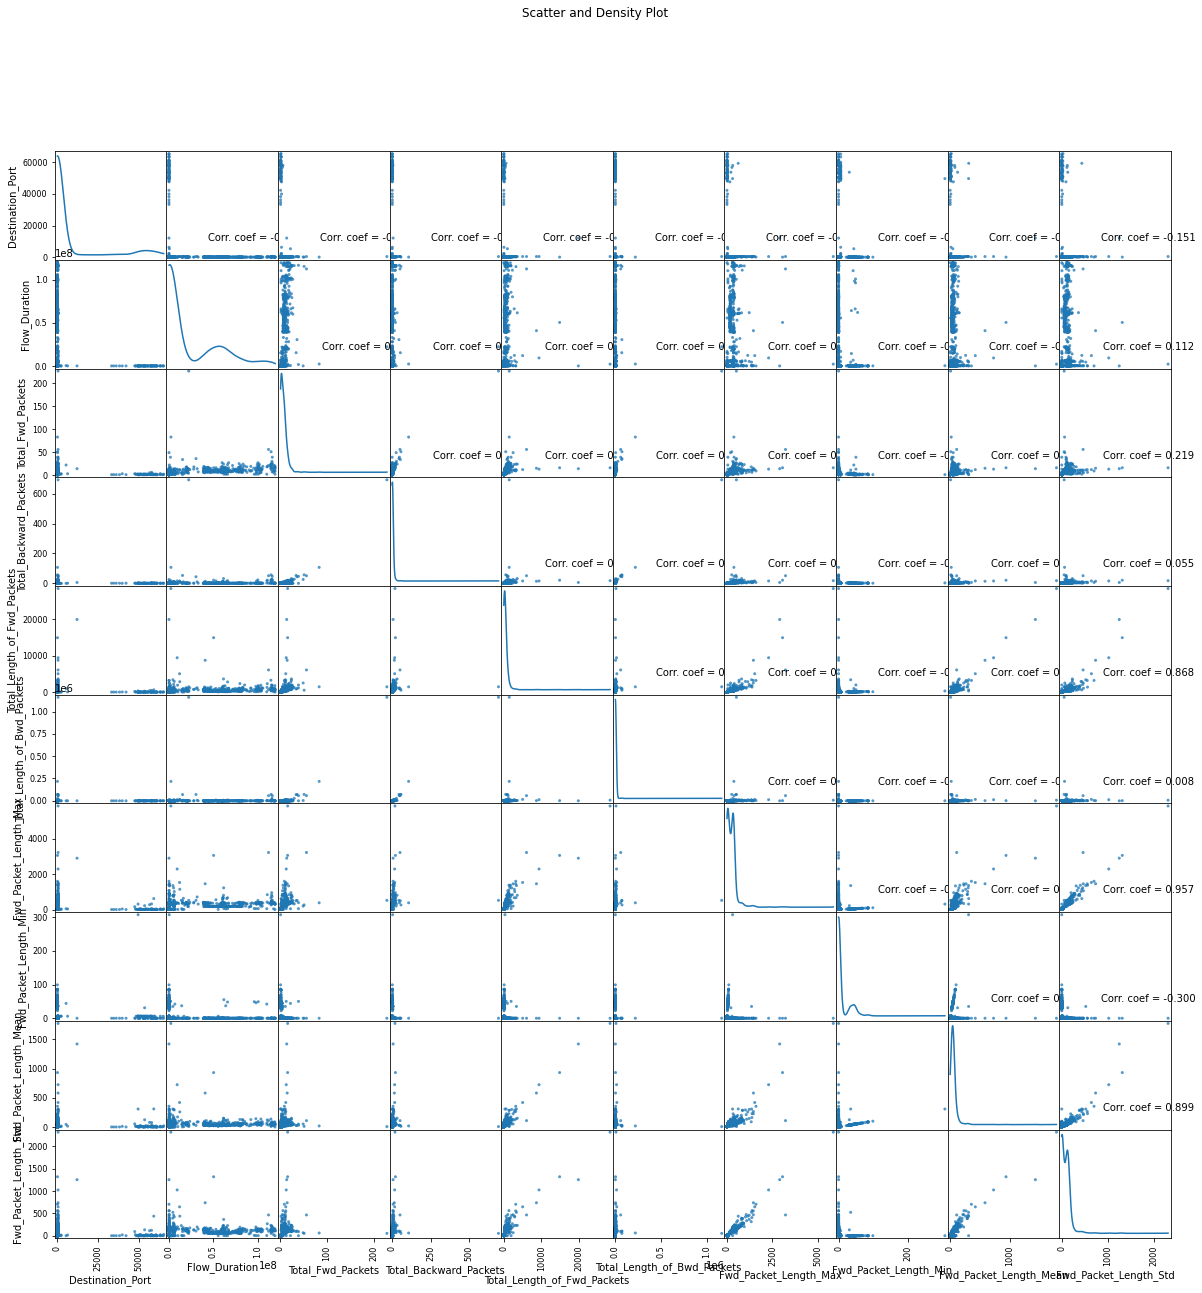

In [17]:
plotScatterMatrix(df2, 20, 10)

# Learning

## Training Data

In [18]:
nRowsRead = None # specify No. of row. 'None' for whole data
# test_mosaic.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
train_data = pd.read_csv(r'C:\Users\USER\alif\fix\fix_data\train_mosaic.csv', delimiter=',', nrows = nRowsRead)
train_data.dataframeName = 'train_mosaic.csv'
nRow, nCol = train_data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 809361 rows and 78 columns


In [19]:
train_data.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,80,101168794,20,1,969,0,353,0,48.450000,119.083551,...,0.0,739228.5,743103.4661,1264682.0,213775.0,49700000.0,41400000.0,79000000.0,20500000.0,DoS Hulk
1,60711,58,1,1,0,0,0,0,0.000000,0.000000,...,32.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,53,31146,4,2,148,244,37,37,37.000000,0.000000,...,20.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,80,254704,3,4,429,389,423,0,143.000000,242.505670,...,20.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,443,11932077,12,16,5030,15703,1525,0,419.166667,644.896586,...,20.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


## Testing Data

In [20]:
nRowsRead = None # specify No. of row. 'None' for whole data
# test_mosaic.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
test_data = pd.read_csv(r'C:\Users\USER\alif\fix\fix_data\test_mosaic.csv', delimiter=',', nrows = nRowsRead)
test_data.dataframeName = 'test_mosaic.csv'
nRow, nCol = test_data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 346869 rows and 78 columns


In [21]:
test_data.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,53,87750,2,2,72,264,36,36,36.000000,0.000000,...,32.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,BENIGN
1,53,31073,4,4,120,232,30,30,30.000000,0.000000,...,32.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,BENIGN
2,80,41125329,8,1,387,0,188,0,48.375000,80.505435,...,0.0,1218262.0,0.0,1218262.0,1218262.0,37178044.0,0.00,37178044.0,37178044.0,DoS slowloris
3,53,40633,4,4,140,508,35,35,35.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,BENIGN
4,80,41920705,7,1,211,0,168,0,30.142857,61.300975,...,0.0,2611.0,0.0,2611.0,2611.0,19711185.0,2319322.97,21351194.0,18071176.0,DoS slowloris


### Identifikasi Class

In [22]:
train_data['Label'].unique()
test_data['Label'].unique()

array(['BENIGN', 'DoS slowloris', 'DoS Hulk'], dtype=object)

> Through the network analysis the lables are assigned having three classes. 
>1. Benign: Legit 
>2. DoS slowloris:DoS attack 
>3. DoS Hulk: DDoS attack.

### Encode kelas string ke numerik untuk melakukan proses lebih lanjut.

In [23]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
train_data['Label'] = label_encoder.fit_transform(train_data['Label'])
test_data['Label'] = label_encoder.fit_transform(test_data['Label'])

### Updated Data

In [24]:
train_data.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,80,101168794,20,1,969,0,353,0,48.450000,119.083551,...,0.0,739228.5,743103.4661,1264682.0,213775.0,49700000.0,41400000.0,79000000.0,20500000.0,1
1,60711,58,1,1,0,0,0,0,0.000000,0.000000,...,32.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0
2,53,31146,4,2,148,244,37,37,37.000000,0.000000,...,20.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0
3,80,254704,3,4,429,389,423,0,143.000000,242.505670,...,20.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0
4,443,11932077,12,16,5030,15703,1525,0,419.166667,644.896586,...,20.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0


In [25]:
test_data.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,53,87750,2,2,72,264,36,36,36.000000,0.000000,...,32.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0
1,53,31073,4,4,120,232,30,30,30.000000,0.000000,...,32.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0
2,80,41125329,8,1,387,0,188,0,48.375000,80.505435,...,0.0,1218262.0,0.0,1218262.0,1218262.0,37178044.0,0.00,37178044.0,37178044.0,2
3,53,40633,4,4,140,508,35,35,35.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0
4,80,41920705,7,1,211,0,168,0,30.142857,61.300975,...,0.0,2611.0,0.0,2611.0,2611.0,19711185.0,2319322.97,21351194.0,18071176.0,2


# Split Dataset

In [26]:
X_train = train_data.drop('Label',axis=1)
X_test = test_data.drop('Label',axis=1)
y_train = train_data['Label']
y_test = test_data['Label']


## Data Train

In [27]:
X_train.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,80,101168794,20,1,969,0,353,0,48.450000,119.083551,...,3.0,0.0,739228.5,743103.4661,1264682.0,213775.0,49700000.0,41400000.0,79000000.0,20500000.0
1,60711,58,1,1,0,0,0,0,0.000000,0.000000,...,0.0,32.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
2,53,31146,4,2,148,244,37,37,37.000000,0.000000,...,3.0,20.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
3,80,254704,3,4,429,389,423,0,143.000000,242.505670,...,2.0,20.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
4,443,11932077,12,16,5030,15703,1525,0,419.166667,644.896586,...,11.0,20.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
y_train.head()

0    1
1    0
2    0
3    0
4    0
Name: Label, dtype: int32

## Data Test

In [29]:
X_test.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,53,87750,2,2,72,264,36,36,36.000000,0.000000,...,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
1,53,31073,4,4,120,232,30,30,30.000000,0.000000,...,3.0,32.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2,80,41125329,8,1,387,0,188,0,48.375000,80.505435,...,4.0,0.0,1218262.0,0.0,1218262.0,1218262.0,37178044.0,0.00,37178044.0,37178044.0
3,53,40633,4,4,140,508,35,35,35.000000,0.000000,...,3.0,20.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
4,80,41920705,7,1,211,0,168,0,30.142857,61.300975,...,4.0,0.0,2611.0,0.0,2611.0,2611.0,19711185.0,2319322.97,21351194.0,18071176.0


In [30]:
y_test.head()

0    0
1    0
2    2
3    0
4    2
Name: Label, dtype: int32

In [31]:
# create gaussian naive bayes classifier
gnb = GaussianNB()
#Train the model using the training sets
gnb.fit(X_train,y_train)
#Predict the response for test dataset
gnb_pred = gnb.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy : ",metrics.accuracy_score(y_test,gnb_pred))

Accuracy :  0.9481879326200958
